<a href="https://colab.research.google.com/github/DuongDuyThoai/bai-tap-AI/blob/main/nhandientien.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
%cd /content/gdrive/MyDrive/Colab Notebooks/tien

/content/gdrive/MyDrive/Colab Notebooks/tien


In [4]:
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [5]:
training_set=train_datagen.flow_from_directory('/content/gdrive/MyDrive/Colab Notebooks/tien/train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 644 images belonging to 9 classes.


In [6]:
test_set = train_datagen.flow_from_directory('/content/gdrive/MyDrive/Colab Notebooks/tien/test',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 95 images belonging to 9 classes.


In [7]:
training_set.class_indices

{'100K': 0,
 '10K': 1,
 '1K': 2,
 '200K': 3,
 '20K': 4,
 '2K': 5,
 '500K': 6,
 '50K': 7,
 '5K': 8}

In [8]:
test_set.class_indices

{'100K': 0,
 '10K': 1,
 '1K': 2,
 '200K': 3,
 '20K': 4,
 '2K': 5,
 '500K': 6,
 '50K': 7,
 '5K': 8}

In [9]:
model=Sequential()

model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(9,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [10]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(training_set,epochs=100,batch_size=128,verbose=1, validation_data=test_set, callbacks=[EarlyStopping(monitor='val_loss', patience=20)])

Epoch 1/100
21/21 [==============================] - 256s 12s/step - loss: 3.6851 - accuracy: 0.1134 - val_loss: 2.1907 - val_accuracy: 0.1263
Epoch 2/100
21/21 [==============================] - 13s 639ms/step - loss: 2.1260 - accuracy: 0.1786 - val_loss: 2.2173 - val_accuracy: 0.1053
Epoch 3/100
21/21 [==============================] - 13s 645ms/step - loss: 2.0675 - accuracy: 0.2065 - val_loss: 2.1428 - val_accuracy: 0.2000
Epoch 4/100
21/21 [==============================] - 14s 661ms/step - loss: 1.9814 - accuracy: 0.2407 - val_loss: 2.2393 - val_accuracy: 0.1895
Epoch 5/100
21/21 [==============================] - 14s 669ms/step - loss: 1.8211 - accuracy: 0.3354 - val_loss: 2.2675 - val_accuracy: 0.2000
Epoch 6/100
21/21 [==============================] - 13s 640ms/step - loss: 1.7289 - accuracy: 0.3478 - val_loss: 2.3161 - val_accuracy: 0.2105
Epoch 7/100
21/21 [==============================] - 14s 651ms/step - loss: 1.5386 - accuracy: 0.3866 - val_loss: 2.1295 - val_accuracy: 

In [11]:
model.save('VNMONEY.h5')

In [12]:
model_tien = load_model('VNMONEY.h5')

In [13]:
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.3905746340751648
Train Accuracy 0.8773291707038879


1/1 [==============================] - 0s 83ms/step
Đây là tờ: 5K


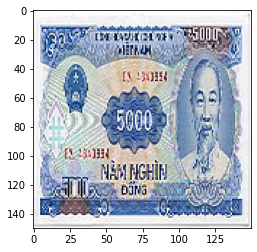

In [14]:
img = load_img('/content/1.jpg',target_size = (150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_tien.predict(img)
class_tien=['100K',
 '10K',
 '1K',
 '200K',
 '20K',
 '2K',
 '500K',
 '50K',
 '5K']
a= int(np.argmax(model.predict(img),axis=1))
print("Đây là tờ:", class_tien[a])

1/1 [==============================] - 0s 17ms/step
Đây là tờ: 100K


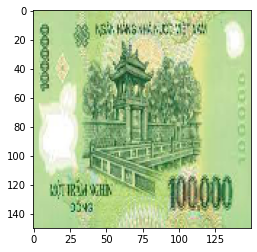

In [16]:
img = load_img('/content/2.jfif',target_size = (150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_tien.predict(img)
class_tien=['100K',
 '10K',
 '1K',
 '200K',
 '20K',
 '2K',
 '500K',
 '50K',
 '5K']
a= int(np.argmax(model.predict(img),axis=1))
print("Đây là tờ:", class_tien[a])